# Final Project - Python Data Science
https://www.kaggle.com/c/sanbercode-ds-final-project/overview
### Teuku Muhammad Kemal Isfan
### t.m.kemalisfan@gmail.com

In [1]:
#Import Library
import pandas as pd
import numpy as np

df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

df_train = df_train_raw.copy()
df_test = df_test_raw.copy()

In [2]:
print(df_train.shape)
print(df_test.shape)

(1500, 22)
(500, 21)


### Mempelajari informasi dari data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   daya_baterai        500 non-null    int64  
 2   bluetooth           500 non-null    int64  
 3   kecepatan_clock     500 non-null    float64
 4   dual_sim            500 non-null    int64  
 5   kamera_depan        500 non-null    int64  
 6   four_g              500 non-null    object 
 7   memori_internal     500 non-null    int64  
 8   tebal_hp            500 non-null    float64
 9   berat_hp            500 non-null    int64  
 10  jumlah_prosesor     500 non-null    int64  
 11  kamera_belakang_mp  500 non-null    int64  
 12  px_panjang          500 non-null    int64  
 13  px_lebar            500 non-null    int64  
 14  kapasitas_ram       500 non-null    int64  
 15  panjang_layar       500 non-null    int64  
 16  lebar_la

#### DataFrame df_train memiliki kolom lebih banyak karena ada kolom 'price-range' 

In [5]:
df_train['price_range'].value_counts()

1000k-<2000k    390
0-<1000k        376
2000k-3000k     375
>3000k          359
Name: price_range, dtype: int64

---

## Preprocessing Data

### Memeriksa apakah DataFrame df_train dan df_test memiliki  missing value

In [6]:
# membuat function untuk menampilkan missing value dengan method .isnull()

def miss_val(df):
    for col in df.columns.tolist():
        print('Missing value in {} column : {}'.format(col,df[col].isnull().sum()))
    print('\n')

In [7]:
miss_val(df_train)

Missing value in index column : 0
Missing value in daya_baterai column : 0
Missing value in bluetooth column : 0
Missing value in kecepatan_clock column : 50
Missing value in dual_sim column : 0
Missing value in kamera_depan column : 0
Missing value in four_g column : 0
Missing value in memori_internal column : 0
Missing value in tebal_hp column : 0
Missing value in berat_hp column : 0
Missing value in jumlah_prosesor column : 0
Missing value in kamera_belakang_mp column : 0
Missing value in px_panjang column : 0
Missing value in px_lebar column : 0
Missing value in kapasitas_ram column : 0
Missing value in panjang_layar column : 119
Missing value in lebar_layar column : 0
Missing value in waktu_telfon column : 0
Missing value in three_g column : 0
Missing value in touch_screen column : 0
Missing value in wifi column : 0
Missing value in price_range column : 0




In [8]:
miss_val(df_test)

Missing value in index column : 0
Missing value in daya_baterai column : 0
Missing value in bluetooth column : 0
Missing value in kecepatan_clock column : 0
Missing value in dual_sim column : 0
Missing value in kamera_depan column : 0
Missing value in four_g column : 0
Missing value in memori_internal column : 0
Missing value in tebal_hp column : 0
Missing value in berat_hp column : 0
Missing value in jumlah_prosesor column : 0
Missing value in kamera_belakang_mp column : 0
Missing value in px_panjang column : 0
Missing value in px_lebar column : 0
Missing value in kapasitas_ram column : 0
Missing value in panjang_layar column : 0
Missing value in lebar_layar column : 0
Missing value in waktu_telfon column : 0
Missing value in three_g column : 0
Missing value in touch_screen column : 0
Missing value in wifi column : 0




In [9]:
# Tidak ada missing value pada df_test, 
# sementara ada dua kolom (kecepatan clock & panjang layar) pada df_train yang memiliki missing value

### Data filling / replacing.  (Mengubah NaN value)

#### Kolom 'kecepatan_clock'

In [10]:
# Merubah nilai NaN dengan metode .mean() karena data kolom 'kecepatan_clock' bertipe numerik 

df_train['kecepatan_clock'] = df_train['kecepatan_clock'].fillna(df_train['kecepatan_clock'].mean())
print(df_train['kecepatan_clock'].isnull().sum())

0


#### Kolom 'panjang_layar'

In [11]:
# Merubah nilai NaN dengan metode .mean() karena data bertipe numerik 

df_train['panjang_layar'] = df_train['panjang_layar'].fillna(df_train['panjang_layar'].mean())
print(df_train['panjang_layar'].isnull().sum())

0


##   Encoding data Pada df_train dan df_test

#### kolom 'four_g' memiliki value 'Tidak' dan 'Ya' --> encode menjadi 0 & 1

In [12]:
four_g_dict = {'Tidak' : 0, 'Ya' : 1}

# for df_train :
df_train['four_g'] = df_train['four_g'].replace(four_g_dict)


# for df_test :
df_test['four_g'] = df_test['four_g'].replace(four_g_dict)

### Merubah kolom 'price_range' sesuai ketentuan pada Kaggle

In [13]:
df_train['price_range'].value_counts()

1000k-<2000k    390
0-<1000k        376
2000k-3000k     375
>3000k          359
Name: price_range, dtype: int64

In [14]:
price_range_dict = {'0-<1000k' : 0,
                    '1000k-<2000k' : 1,
                    '2000k-3000k' : 2,
                    '>3000k' : 3
                   }
                    
df_train['price_range'] = df_train['price_range'].replace(price_range_dict)

In [15]:
df_train['price_range'].value_counts()

1    390
0    376
2    375
3    359
Name: price_range, dtype: int64

### Melihat korelasi setiap kolom 

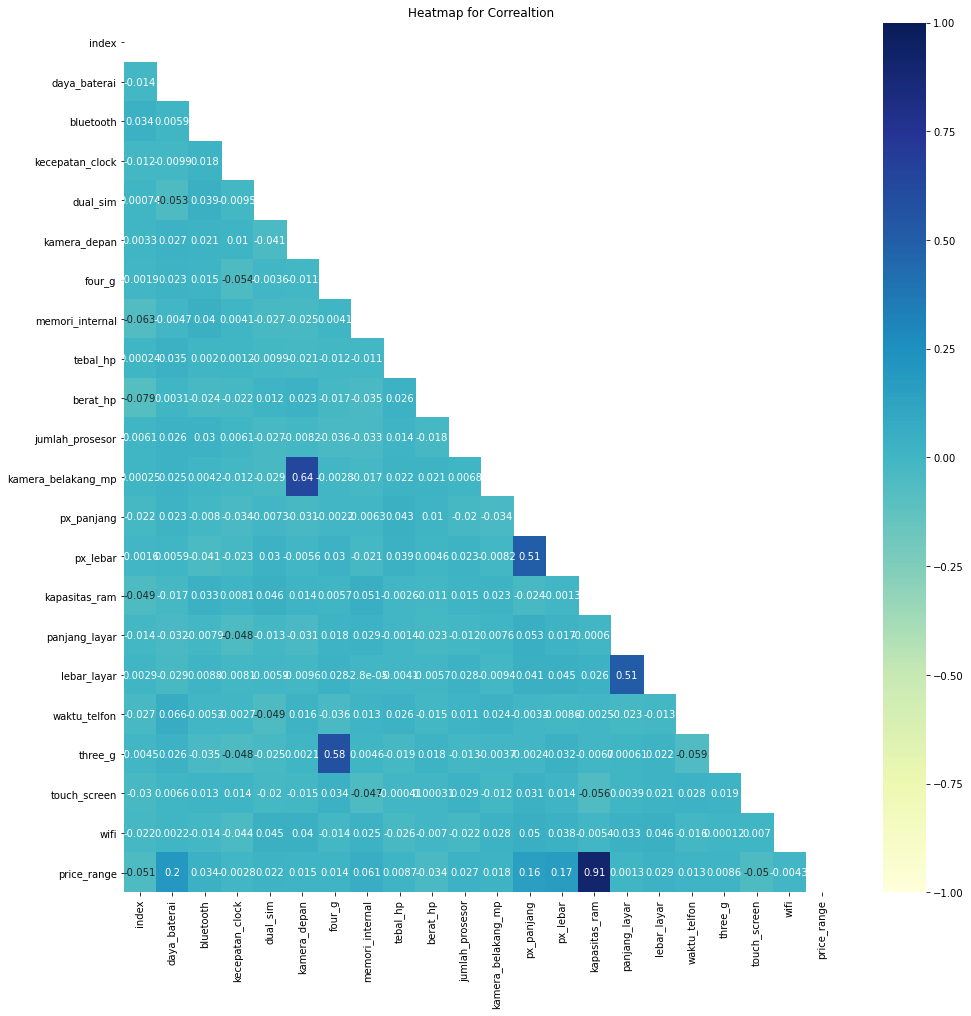

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,16))
mask = np.triu(np.ones_like(df_train.corr())) 
sns.heatmap(df_train.corr(),vmin=-1,vmax=1, mask=mask, annot = True, cmap="YlGnBu")
plt.title('Heatmap for Correaltion')
plt.show()

##### dari plot di atas, dapat dilihat bahwa kolom yang berpengaruh signifikan terhadap 'price_range' adalah kolom 'kapasitas_ram' 

--- 

# Modelling

### Membuat Variabel untuk train dan validasi

Kita memiliki 2 data, yaitu 'train.csv' dan 'test.csv', tetapi pada data test.csv tidak memiliki kolom target (kolom 'price_range') sehingga kita tidak dapat memeriksa performa model.

agar dapat memeriksa performa model, kita split df_train menjadi dataset 'train' dan dataset 'valid'.

In [18]:
# Keterangan :
#              x = data df_train kecuali kolom 'price_range'
#              y = kolom 'price_range' dari df_train

x = df_train.drop('price_range', axis = 1).drop('index', axis = 1)
y = df_train['price_range']

x_test = df_test.drop('index', axis = 1).copy()
x_test

,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
2,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
3,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
4,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,805,0,0.8,0,1,0,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
496,1162,0,1.0,0,0,0,50,0.5,104,4,10,332,866,1404,10,3,15,1,1,1
497,1759,1,1.4,0,10,1,15,0.4,101,4,13,382,1163,2107,18,5,16,1,1,0
498,514,1,1.6,0,7,1,37,0.1,172,1,9,956,1723,3392,12,8,5,1,1,1


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [20]:
# memeriksa hasil split
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(1200, 20)
(1200,)
(300, 20)
(300,)


## Algoritma Machine Learning

#### Untuk melakukan prediksi, algoritma akan diaplikasikan pada dataset 'train' dan 'valid'. Algoritma yang digunakan juga akan di-tuning hyperparameternya dengan fungsi GridSearchCV

#### Algoritma yang digunakan & dibandingkan adalah :
- Random Forest
- KNN
- Naive Bayes

### Random Forest Classifier

In [21]:
# Import library algoritma Random Forest & fungsi GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

# Membuat dictionary parameter Random Forest untuk Cross Validation
params = {'n_estimators' : np.arange(100,200,10),
          'criterion' : ['gini','entropy'],          
          'max_features' : ['auto','sqrt','log2']
         }

# Ketentuan scoring = fmean score / f1_score
scoring = make_scorer(f1_score, average = ('micro'))

In [22]:
gscv_rfc = GridSearchCV(rfc, params, scoring = scoring , cv= 10)

In [23]:
#gscv_rfc.fit(x_train,y_train) 
# ------------------ DIBERI TAGAR KARENA RUN MEMAKAN WAKTU LAMA ----------------------

In [24]:
# Hasil running :

# GridSearchCV(cv=10, estimator=RandomForestClassifier(),
#             param_grid={'criterion': ['gini', 'entropy'],
#                         'max_features': ['auto', 'sqrt', 'log2'],
#                         'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
#        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
#        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
#        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
#       102, 103, 104, 105, 106, 107, 108, 109, 110...
#       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
#       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
#       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
#       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
#       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
#       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
#       193, 194, 195, 196, 197, 198, 199])},
#             scoring=make_scorer(f1_score, average=micro))

In [25]:
# Mengambil hyperparameter terbaik dan score validasi terbaik dari hasil GridSearchCV

# print(gscv_rfc.best_params_)
# print(gscv_rfc.best_score_)

In [26]:
# Hasil Running cell di atas :
# {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 165}
# 0.8808333333333334

In [23]:
# Membuat model dengan tuning hyperparameter
model_rfc = RandomForestClassifier(n_estimators = 165, criterion = 'entropy', max_features = 'log2')
train_rfc = model_rfc.fit(x_train, y_train)

In [24]:
y_pred_rfc =  model_rfc.predict(x_valid)

In [26]:
f1_score_rfc_micro = f1_score(y_valid, y_pred_rfc, average = 'micro')
print(f1_score_rfc_micro)

f1_score_rfc_macro = f1_score(y_valid, y_pred_rfc, average = 'macro')
print(f1_score_rfc_macro)

f1_score_rfc_weighted = f1_score(y_valid, y_pred_rfc, average = 'weighted')
print(f1_score_rfc_weighted)

acc_rfc = accuracy_score(y_valid, y_pred_rfc)
print(acc_rfc)

cf_rfc = confusion_matrix(y_valid, y_pred_rfc)
print(cf_rfc)

0.9066666666666666
0.9077407604922371
0.9069191712868397
0.9066666666666666
[[66  9  0  0]
 [ 4 70  4  0]
 [ 0  4 67  4]
 [ 0  0  3 69]]


### KNN

In [27]:
# Import library algoritma Random Forest
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params_knn = {'n_neighbors' : np.arange(90, 200,10), 
          'weights' : ['uniform', 'distance'], 
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],  
          }

In [28]:
gscv_knn = GridSearchCV(knn, params_knn, cv = 10)

In [50]:
# gscv_knn.fit(x_train, y_train)
# ------------------ DIBERI TAGAR KARENA RUN MEMAKAN WAKTU LAMA ----------------------

In [51]:
# Hasil running :

#GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
#             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'n_neighbors': array([ 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]),
#                         'weights': ['uniform', 'distance']})

In [52]:
# Mengambil hyperparameter terbaik dan score validasi terbaik dari hasil GridSearchCV
#print(gscv_knn.best_params_)

In [53]:
# Hasil running cell di atas :

#{'algorithm': 'auto', 'n_neighbors': 90, 'weights': 'distance'}

In [29]:
# Membuat model dengan tuning hyperparameter
model_knn = KNeighborsClassifier(algorithm =  'auto', n_neighbors = 90, weights = 'distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=90, weights='distance')

In [30]:
y_pred_knn =  model_knn.predict(x_valid)

In [31]:
f1_score_knn_micro = f1_score(y_valid, y_pred_knn, average = 'micro')
print(f1_score_knn_micro)

f1_score_knn_macro = f1_score(y_valid, y_pred_knn, average = 'macro')
print(f1_score_knn_macro)

f1_score_knn_weighted = f1_score(y_valid, y_pred_knn, average = 'weighted')
print(f1_score_knn_weighted)

acc_knn = accuracy_score(y_valid, y_pred_knn)
print(acc_knn)

cf_knn = confusion_matrix(y_valid, y_pred_knn)
print(cf_knn)

0.9466666666666667
0.9469965070127521
0.9469194589737638
0.9466666666666667
[[73  2  0  0]
 [ 2 73  3  0]
 [ 0  2 72  1]
 [ 0  0  6 66]]


### Naive Bayes

In [32]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score

In [33]:
svc = SVC()

# Ketentuan scoring = fmean score / f1_score
scoring = make_scorer(f1_score, average = ('micro'))

params_NB = {'C' : [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
             'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
             'kernel': ['rbf','linear']
            }

gscv_NB = GridSearchCV(svc, params_NB, scoring = scoring, cv = 10)

In [34]:
# gscv_NB.fit(x_train, y_train)
# ------------------ DIBERI TAGAR KARENA RUN MEMAKAN WAKTU LAMA ----------------------

In [35]:
#print(gscv_NB.best_params_)
#print(gscv_NB.best_score_)

In [ ]:
# # Hasil running cell di atas :

# {'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}
# 0.9783333333333333

In [34]:
model_NB = SVC(C = 0.05, gamma = 0.1, kernel = 'linear')
model_NB.fit(x_train, y_train)

SVC(C=0.05, gamma=0.1, kernel='linear')

In [35]:
y_pred_NB =  model_NB.predict(x_valid)

In [36]:
f1_score_NB_micro = f1_score(y_valid, y_pred_NB, average = 'micro')
print(f1_score_NB_micro)

f1_score_NB_macro = f1_score(y_valid, y_pred_NB, average = 'macro')
print(f1_score_NB_macro)

f1_score_NB_weighted = f1_score(y_valid, y_pred_NB, average = 'weighted')
print(f1_score_NB_weighted)

acc_NB = accuracy_score(y_valid, y_pred_NB)
print(acc_NB)

cf_NB = confusion_matrix(y_valid, y_pred_NB)
print(cf_NB)

0.97
0.9701594415216706
0.9699744948893556
0.97
[[75  0  0  0]
 [ 2 73  3  0]
 [ 0  1 73  1]
 [ 0  0  2 70]]


## Membandingkan Hasil Prediksi

In [37]:
import matplotlib.pyplot as plt

In [38]:
labels = ['f1_micro','f1_macro','f1_weighted', 'Accuracy']
random_forest = [f1_score_rfc_micro, f1_score_rfc_macro, f1_score_rfc_weighted, acc_rfc]
knn = [f1_score_knn_micro, f1_score_knn_macro, f1_score_knn_weighted, acc_knn]
naive_bayes = [f1_score_NB_micro, f1_score_NB_macro, f1_score_NB_weighted, acc_NB]

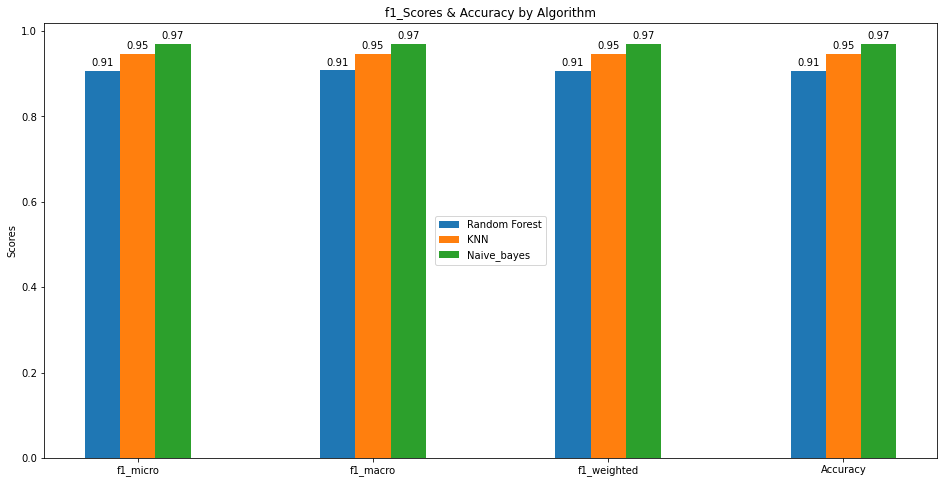

In [40]:
x = 2*np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width, random_forest, width, label='Random Forest')
rects2 = ax.bar(x , knn, width, label='KNN')
rects3 = ax.bar(x + width, naive_bayes, width, label='Naive_bayes')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
ax.set_ylabel('Scores')
ax.set_title('f1_Scores & Accuracy by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.show()

#### Dari grafik di atas, dapat disimpulkan bahwa Algoritma Naive Bayes menghasilkan nilai fmean score / f1 score yang terbaik (Konsisten di angka 97 %). 

#### Langkah selanjutnya adalah memprediksi nilai 'price_range' untuk DataFrame 'df_test'

---

# Run algoritma Naive Bayes kedalam dataset 'df_test'

In [41]:
# Melakukan Prediksi

price_range_pred_NB = model_NB.predict(x_test)
price_range_pred_NB

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [42]:
# Menambahkan kolom 'price_range' dengan data yang telah dibuat di atas

df_test['price_range'] = price_range_pred_NB
df_test

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,405,1454,1,0.5,1,1,0,34,0.7,83,...,250,1033,3419,7,5,5,1,1,0,3
1,1190,1092,1,0.5,1,10,0,11,0.5,167,...,468,571,737,14,4,11,0,1,0,0
2,1132,1524,1,1.8,1,0,0,10,0.6,174,...,154,550,2678,16,5,13,1,0,1,2
3,731,1807,1,2.1,0,2,0,49,0.8,125,...,337,1384,1906,17,13,13,0,1,1,2
4,1754,1086,1,1.7,1,0,1,43,0.2,111,...,56,1150,3285,11,5,17,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,0,34,0.6,88,...,1262,1538,3647,18,11,9,1,0,1,3
496,1524,1162,0,1.0,0,0,0,50,0.5,104,...,332,866,1404,10,3,15,1,1,1,0
497,1415,1759,1,1.4,0,10,1,15,0.4,101,...,382,1163,2107,18,5,16,1,1,0,2
498,1223,514,1,1.6,0,7,1,37,0.1,172,...,956,1723,3392,12,8,5,1,1,1,3


In [43]:
# Membuat DataFrame sesuai ketentuan di Kaggle

result_NB = df_test[['index','price_range']].astype(int)
result_NB

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2
...,...,...
495,936,3
496,1524,0
497,1415,2
498,1223,3


In [47]:
#Save file .csv

result_NB.to_csv('Submission_NB3.csv', index = False)

In [48]:
# Memeriksa format file .csv 

format_check = pd.read_csv('submission_NB3.csv')
format_check.head()

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2
